In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Q.1.
You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:


In [4]:
laliga = pd.read_csv("F:/Great Lakes/Strategy Making for Decision Making/Project/Stats Mini Project/Laliga.csv")

In [6]:
laliga.head(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [8]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
Pos              61 non-null int64
Team             61 non-null object
Seasons          61 non-null int64
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null int64
dtypes: int64(3), object(17)
memory usage: 9.7+ KB


In [10]:
laliga.isna().sum()

Pos              0
Team             0
Seasons          0
Points           0
GamesPlayed      0
GamesWon         0
GamesDrawn       0
GamesLost        0
GoalsFor         0
GoalsAgainst     0
Champion         0
Runner-up        0
Third            0
Fourth           0
Fifth            0
Sixth            0
T                0
Debut            0
Since/LastApp    0
BestPosition     0
dtype: int64

In [11]:
laliga.replace('-', np.nan, inplace = True)
laliga = laliga.fillna(0)
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955-56,1955-56,15


In [18]:
laliga.shape

(61, 20)

In [20]:
laliga.describe()

,Pos,Seasons,BestPosition
count,61.000000,61.000000,61.000000
mean,31.000000,24.000000,7.081967
std,17.752934,26.827225,5.276663
min,1.000000,1.000000,1.000000
25%,16.000000,4.000000,3.000000
50%,31.000000,12.000000,6.000000
75%,46.000000,38.000000,10.000000
max,61.000000,86.000000,20.000000


# 1.	Which are the teams which started playing between 1930-1980?

In [21]:
laliga['Debut'] = laliga['Debut'].astype(str).str[:4].astype(int)
laliga_new = laliga[laliga['Debut'].between(1930, 1980)]
laliga_new

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987-88,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934,2001-02,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932,2015-16,1
10,11,Deportivo La Coruna,45,1814,1530,563,392,575,2052,2188,1,5,4,1,0,1,12,1941,2014-15,1
11,12,Celta Vigo,51,1789,1698,586,389,723,2278,2624,0,0,0,2,4,5,11,1939,2012-13,4
12,13,Valladolid,42,1471,1466,463,384,619,1767,2180,0,0,0,1,1,1,3,1948,2013-14,4
14,15,Sporting Gijon,43,1389,1458,471,358,629,1753,2152,0,1,1,2,2,1,7,1944,2015-16,2
15,16,Osasuna,37,1351,1318,426,327,565,1500,1834,0,0,0,2,2,2,6,1935,2016-17,4
16,17,Malaga,36,1314,1255,390,330,535,1421,1763,0,0,0,1,0,1,2,1949,2008-09,4


# 2.	Which are the top 5 teams in terms of points?

In [35]:
laliga['Points'] = laliga["Points"].astype(float)
laliga.sort_values(by = ["Points"], ascending = False)[:5]

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385.0,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262.0,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442.0,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386.0,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987-88,1
4,5,Athletic Bilbao,86,3368.0,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


# 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [36]:
laliga['GamesWon'] = laliga.GamesWon.astype(float)
laliga['GamesPlayed'] = laliga.GamesPlayed.astype(float)
laliga['WinningPercent'] = (laliga.iloc[:,5]/laliga.iloc[:,4])*100
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,WinningPercent
0,1,Real Madrid,86,4385.0,2762.0,1647.0,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
1,2,Barcelona,86,4262.0,2762.0,1581.0,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
2,3,Atletico Madrid,80,3442.0,2614.0,1241.0,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,47.475134
3,4,Valencia,82,3386.0,2664.0,1187.0,616,861,4398,3469,...,6,10,11,10,7,50,1931,1987-88,1,44.557057
4,5,Athletic Bilbao,86,3368.0,2762.0,1209.0,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34.0,38.0,8.0,10,20,38,66,...,0,0,0,0,0,0,2009,2009-10,20,21.052632
57,58,Condal,1,22.0,30.0,7.0,8,15,37,57,...,0,0,0,0,0,0,1956,1956-57,16,23.333333
58,59,Atletico Tetuan,1,19.0,30.0,7.0,5,18,51,85,...,0,0,0,0,0,0,1951,1951-52,16,23.333333
59,60,Cultural Leonesa,1,14.0,30.0,5.0,4,21,34,65,...,0,0,0,0,0,0,1955,1955-56,15,16.666667


# 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [52]:
laliga.groupby(laliga.iloc[:,19]).sum()

,Pos,Seasons,Points,GamesPlayed,GamesWon,Debut,BestPosition,WinningPercent
BestPosition,,,,,,,,
1,50,659,27933.0,21532.0,9888.0,17383,9,403.189019
2,79,195,6904.0,6614.0,2255.0,9761,10,173.835110
3,89,154,5221.0,4936.0,1732.0,7751,12,137.110098
4,125,191,6563.0,6497.0,2097.0,11655,24,190.611137
5,115,63,1884.0,2082.0,624.0,7817,20,119.694898
6,158,62,2113.0,2052.0,624.0,9767,30,151.787752
7,190,38,1186.0,1335.0,382.0,9862,35,143.726616
8,154,31,1134.0,1120.0,319.0,7891,32,116.395766
9,107,4,96.0,114.0,26.0,4007,18,22.807018


-------------

# Q 2.
A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg

In [3]:
n = 200
mu = 140
sd = 25

### a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [5]:
standard_error = sd/np.sqrt(n)
print("Standard Error: ", standard_error)

Standard Error:  1.7677669529663687


Standard Error indicates that how accurate the mean of given sample from that population is likely to be compared to the true population mean. When the standard error increases, i.e. the means are more spread out, it becomes more likely that any given mean is an inaccurate representation of the true population mean.

### b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [17]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= n-1,                    # Degrees of freedom
                 loc = mu,         # Sample mean
                 scale = sd)        

(90.70108639376512, 189.29891360623486)

###  c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [18]:
n1 = 100
mu = 140
sd = 25

In [19]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= n1-1,                    # Degrees of freedom
                 loc = mu,         # Sample mean
                 scale = sd) 

(90.39457621228294, 189.60542378771706)

### d)	Which of the two above intervals are wider?

Confidence Iterval for the true mean blood pressure of <b>100 samples having wider intervals</b> than the the samples of 200 samples.

Because if we increasing the sample size decreases the width of confidence intervals, because it decreases the standard error

### e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the sample means cluster more and more around the true population mean. The size (n) of a statistical sample affects the standard error for that sample. Because n is in the denominator of the standard error formula, the standard error decreases as n increases. ... That's because average times don't vary as much from sample to sample as individual times vary from person to person

---------------

# Q.3.
Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.


In [53]:
golf = pd.read_csv("F:/Great Lakes/Strategy Making for Decision Making/Project/Stats Mini Project/Golf.csv")

In [55]:
golf.head(5)

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [58]:
golf.shape

(40, 2)

In [60]:
golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


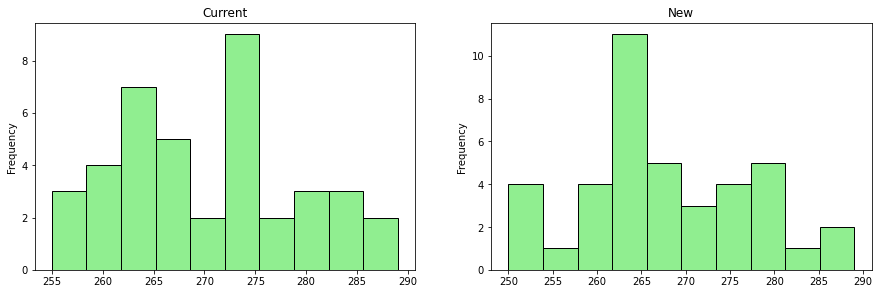

In [83]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
golf["Current"].plot(kind = 'hist', edgecolor = 'black', color = 'lightgreen')
plt.title("Current")
plt.subplot(2,2,2)
golf["New"].plot(kind = 'hist', edgecolor = "Black", color = "lightgreen")
plt.title("New")
plt.show()

Text(0.5, 1.0, 'New')

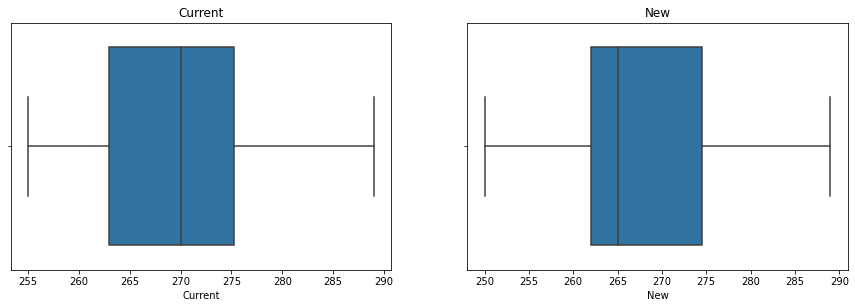

In [84]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(golf.Current)
plt.title("Current")
plt.subplot(2,2,2)
sns.boxplot(golf.New)
plt.title("New")

In [85]:
golf.isna().sum()

Current    0
New        0
dtype: int64

Observations:

- Sample size:40
- Number of samples: 2
- Unpaired variables.
- DOF = 40+40-2 = 78
- There are no outliers in given data, neither missing values.
- Both the samples seem to be normally distributed.
- Mean and median values are not much different.
- The Current driving distance data looks more normally distributed, whereas the driving distances data for New balls looks right skewed.
- There is dip in the performance of Current and New balls driving force as mean, median, min, max values differ.

# H0: Current = New (New coating does not have effect on driving distances)

# H1:Current != New (New coating does not have effect on driving distances)

In [86]:
golf.shape

(40, 2)

In [90]:
import scipy.stats as stats

In [93]:
Ho=  "New coating does not have effect on driving distances"
Ha= "New coating have effect on driving distances"
    
t, p_value  = stats.ttest_ind(golf.Current.values,golf.New.values, axis = 0) 

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ho} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ha} as the p_value ({p_value}) > 0.05')

New coating have effect on driving distances as the p_value (0.18793228491854663) > 0.05


In [94]:
t

1.3283615935245678

- In this scenario, the p value is 0.188 which is greater than the 0.05
- Hence, we failed to reject the Null Hypothesis.
- Thus, accepting the Null Hypothesis that there is no significant change in driving distances due to the new coating.

 # We accept the null Hypothesis and New coating does not have effect on driving distances